## Homework 3: K-mean Clustering
In this homework, you are going to implement the standard K-means clustering algorithm

```python

    ## add your code here
    
    ##
```

### Student information
    1. Your name: Steve Dodd
    2. Department: CS
    3. Graduate

### TA grading: ??/100
    1. ?/20
    2. ?/20
    3.1 ?/20
    3.2 ?/20
    3.3 ?/20


In [0]:
# K-means implementaiton
from sklearn import cluster, datasets
import numpy as np
import matplotlib.pyplot as plt

# Generate a toy dataset
def data_gen(n_samples = 1500, n_ctrs = 3, rand_s = 8):
    blobs = datasets.make_blobs(n_samples=n_samples,random_state=rand_s, centers =n_ctrs)
    return blobs

In [0]:
# 1. show dataset. 20 points
def display2D_clusters(X, y, centroids=None, title = 'Dataset'):
    '''Display 2D data samples and centroids
    Parameters
    ----------
    X: data samples
    y: clustering index
    centroids: an numpy array of centroids
    title: figure title
    
    '''
    ## add your code here-----------------------------------------------------------
    plt.scatter(X[:,0], X[:,1], c=y) # Plot data
    plt.scatter(centroids[:,0], centroids[:,1], marker='X', color='r') # Plot centroids
   
    
    ##---------------------------------------------------------------------------
    
    plt.title(title)
    plt.show()

In [0]:
#2. improve the following code to choose good centroids for initialization (20 points)
# tip: generate centroids multiple times, and good centroids are not close

def mean_min_dis(centroids):
    '''calculate the mean of min distances among centroids
    
    '''
    n = centroids.shape[0]
    min_dis = np.zeros(n)
    
    for i, p in enumerate(centroids):
        ds = np.linalg.norm(centroids - p, axis = 1)
        min_dis[i] = np.min(ds[ds>0])

    d = np.mean(min_dis)  
    #print(d)
    return d

def good_init(X, K = 3, n_init=100):
    '''Generate K 'good' centroids
    
    Parameters:
    -----------
    X: data samples
    K: the number of clusters
    n_init: the number of initializations
    
    Return:
    -------
    c_best: an numpy array of K centroids
    idx_best: indices of the centroids
    
    '''
    
    n = X.shape[0]
    c_best = np.copy(X[0:K, :])#initial centroids
    idx_best=np.zeros(K)
    
    d_best= mean_min_dis(c_best)
    # choose best centroids from n_init random sets
    for i in range(n_init): 
        # generate a random set of centroids: c
        idx = np.random.randint(0, n-1, size=K)
        C_x = X[idx, 0]
        C_y = X[idx, 1]
        c = np.array(list(zip(C_x, C_y)), dtype=np.float32)
        
        # deternim if the current set of centrods (c) is the best by comparing d and d_best
        # if yes, replace c_best using c, d_best with d, and idx_best with idx. 
        ## add your code here------------------------------------------------------------------------
        d = mean_min_dis(c)
        if d > d_best:
            c_best = c
            d_best = d
            idx_best = idx
        ##--------------------------------------------------------------------------------------
    return c_best, idx_best

In [0]:
# 3. The K-means algorithm
def my_kmeans(X, k_list = [1, 2, 3, 4, 5, 6, 7, 8], max_iter = 100):
    '''K-means function
    
    Parameters
    -----------
    X: input data samples
    k_list: list of all possible number of clusters
    max_iter: max iterations
    
    
    Returns 
    -------
    best_k: the best k from k_list
    best_cluster_idx: the cluster indices
    best_ctrs: centroids
    best_inertia: inertia (within-cluster sum of squared distance)
    
    '''
    best_k = k_list[0]
    best_inertia = np.inf
    best_cluster_idx = np.zeros(len(X))
    
    for k in k_list:
        #step 1: initilization using the good_init function.
        ctrs, idx = good_init(X, K = k)

        itr = 0
        cluster_idx = np.zeros(len(X))
        dists = np.zeros((len(X), k))
        while itr <= max_iter: #max_iter is the stopping condition
            #3.1. Step 2.1: measure the distance to every center, and assign cluster index to every sample. 20 points
            #use X and ctrs to calculate dists, and cluster_idx to store the cluster index for every sample
            ## add your code here----------------------------------------------------------------

            for i, ctr in enumerate(ctrs):
                dist = np.linalg.norm(X - ctr, axis = 1)
                dists[:, i] = dist

            for i, row in enumerate(dists):
                cluster_idx[i] = np.argmin(row)

            ##-------------------------------------------------------------------------------

            #3.2. Step 2.2: update centroids ctrs using X and cluster_idx. 20 points
            ## add your code here-----------------------------------------------------------------

            for i in range(k):
                ctrs[i] = X[cluster_idx == i].mean(axis=0)

            ##-------------------------------------------------------------------------------
            
            itr += 1
        # end while
        
        #3.3. calculate the inertia: within-cluster sum of squared distance. 20 points
        #store the result to variable to inertia
        ##Your code here-----------------------------------------------------------

        cluster_idx = cluster_idx.astype(int)
        inertia = 0
        for i, x in enumerate(X):
            inertia += np.linalg.norm(x - ctrs[cluster_idx[i]])
        #inertia = inertia/k

        ##-------------------------------------------------------------
        if inertia < best_inertia:
            best_inertia = np.mean(inertia)
            best_k = k
            best_ctrs = np.copy(ctrs)
            best_cluster_idx = np.copy(cluster_idx)
    
    return best_k, best_cluster_idx, best_ctrs, best_inertia

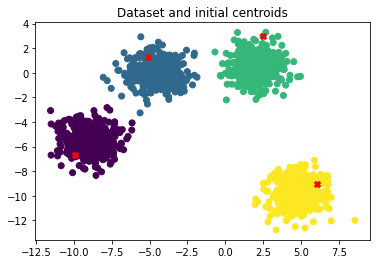

The number of successful initilizations: 8/10


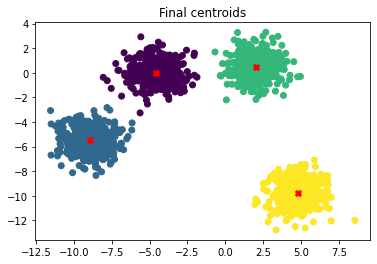

The best number of cluster is 4.
The centroids are [[-4.6040535  -0.02613257]
 [-8.921217   -5.448401  ]
 [ 1.9992279   0.46076077]
 [ 4.77299    -9.748961  ]].
The inertia is 1833.012556735009.


In [186]:
# Do not change the following code
if __name__ == '__main__':
    
    # generate a dataset with k clusters
    k=4
    blobs = data_gen(n_samples = 1500, n_ctrs = k, rand_s = 170)

    #display_clusters(X, y, title = 'Dataset')
    X, y = blobs    
    cents, idx = good_init(X, K = k)
    display2D_clusters(X, y, centroids=cents, title = 'Dataset and initial centroids')

    # evaluate the initialization function
    cnt = 0
    for i in range(10):
        cents, idx = good_init(X, K = k)
        #print(np.sum(y[idx]))
        if np.sum(y[idx])==k*(k-1)/2:
            cnt += 1
    print('The number of successful initilizations: {}/10'.format(cnt)) 
    
    # call the K-means function and print results
    best_k, cluster_idx, ctrs, inertia = my_kmeans(X, k_list = [2, 3, 4], max_iter = 500)
    display2D_clusters(X, cluster_idx, centroids=ctrs, title = 'Final centroids')
    
    print('The best number of cluster is {}.'.format(best_k))
    print('The centroids are {}.'.format(ctrs))
    print('The inertia is {}.'.format(inertia))    

In [187]:
centroids = np.array([1,2,None])
(centroids!= None).all()

False